## Importing all the packages needed

In [1]:
import numpy as np
import tensorflow as tf
import keras as k
import matplotlib.pyplot as plt

Using TensorFlow backend.


> Function to import the dataset

    1. fully_connected if we use an MLP, otherwise it's for a CNN
    2. show_info to check the dataset
    3. noise = False, if you want to add noise to the input, noise = True

In [2]:
def import_data(dataset = "mnist", fully_connected = True, show_info = True, noise = False):
    
    if(dataset == "mnist"):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    if(dataset == "fashion"):
        from keras.datasets import fashion_mnist
        (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
        
    
        
    #some data exploration
    if(show_info == True):
        print('***** Log import_data *****')
        print('Train data shape', x_train.shape)
        print('Test data shape', x_test.shape)
        print('Number of training samples', x_train.shape[0])
        print('Number of testing samples', x_test.shape[0])
        
        for i in range(25):
            plt.subplot(5,5,i+1)    #Add a subplot as 5 x 5 
            plt.xticks([])          #get rid of labels
            plt.yticks([])          #get rid of labels
            plt.imshow(x_test[i], cmap="gray")
        plt.show()
        print('***** ***** *****  *****')
    
    #Para o caso em que sejam as MLP
    if(fully_connected == True):
        
        #Check if it is a RGB scale image
        if(len(x_train.shape) == 4):
            x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3]).astype('float32')
            x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3]).astype('float32')
        #Gray Scale image
        else:
            #reshape the input to have a list of self.batch_size by 28*28 = 784; and normalize (/255)
            x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]).astype('float32')
            x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]).astype('float32')
            #reserve 5000 samples for validation
    
    else:
        #Check if it is a gray scale image or a RGB scale image
        #(images,dimensio,dimension,channels)
        if(len(x_train.shape) == 3):
            x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],x_train.shape[2],1).astype('float32')
            x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],x_test.shape[2],1).astype('float32')
    
    #Normalization
    x_train = x_train/255
    x_test = x_test/255
    
    if( noise == True):
        x_train = x_train + np.random.normal(loc=0.0, scale=0.5, size= x_train.shape)
        x_train = np.clip(x_train, 0., 1.) #para podar os valores menores do que
        x_test = x_test + np.random.normal(loc=0.0, scale=0.5, size= x_test.shape)
        x_test = np.clip(x_test, 0., 1.)
    
    
    return x_train, y_train, x_test, y_test

11493376/11490434 [==============================] - 0s 0us/step
***** Log import_data *****
Train data shape (60000, 28, 28)
Test data shape (10000, 28, 28)
Number of training samples 60000
Number of testing samples 10000


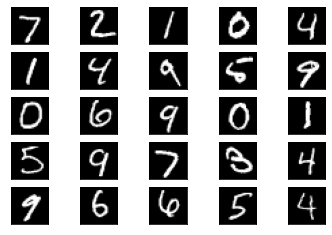

***** ***** *****  *****


In [3]:
x_train, y_train, x_test, y_test = import_data(dataset = "mnist", fully_connected = True, show_info = True)

> Function to plot the accuracy and loss of model

In [4]:
def show_history(history):
    print(history.history.keys())

    plt.subplot(1, 2, 1)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')    
        
    plt.subplot(1, 2, 2)
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [5]:
from keras.models import Model
from keras import Input
from keras.layers import Dense

### First, a simple AutoEncoder for Mnist Dataset

> Architecture :  Image(784 pixeis) -> Dense(32) -> Dense(784)

In [6]:
def create_AutoEncoder():
    
    input_image = Input(shape=(784,))
    
    encoded = Dense(32, activation = 'relu')(input_image)
    
    decoded = Dense(784,activation = 'sigmoid')(encoded)
    
    encoder = Model(inputs = input_image, outputs = encoded)
    
    auto_encoder = Model(inputs = input_image, outputs = decoded)
    
    return auto_encoder, encoder

(auto_encoder, encoder) = create_AutoEncoder()

print("\n############### ENCODER #################")
encoder.summary()
print("\n############### ENCODER + DECODER #################")
auto_encoder.summary()


############### ENCODER #################
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________

############### ENCODER + DECODER #################
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 

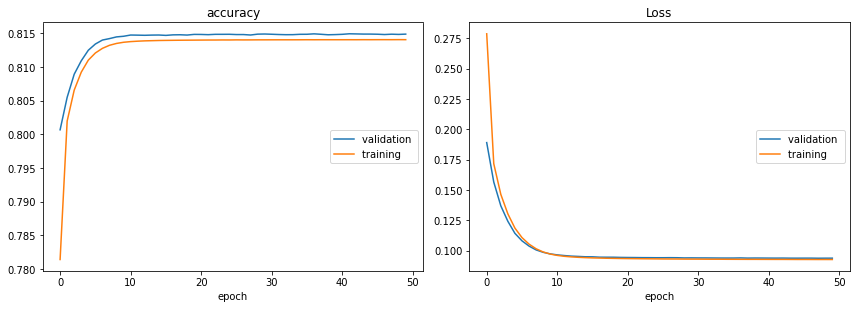

accuracy
	validation       	 (min:    0.801, max:    0.815, cur:    0.815)
	training         	 (min:    0.781, max:    0.814, cur:    0.814)
Loss
	validation       	 (min:    0.094, max:    0.189, cur:    0.094)
	training         	 (min:    0.093, max:    0.279, cur:    0.093)


In [7]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

(auto_encoder, encoder) = create_AutoEncoder()
auto_encoder.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])
history = auto_encoder.fit(x_train, x_train, epochs = 50, shuffle = True, batch_size = 200, validation_split = 0.2, callbacks = [PlotLossesKeras()])

Original Images - first 10 images of X_test


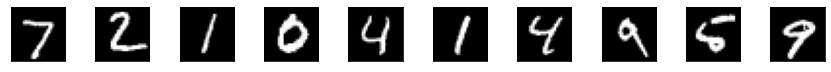

Encoded Images - first 10 images of X_test


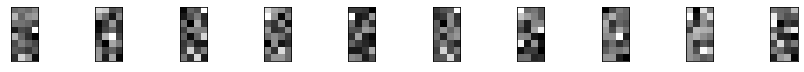

Decoded Images - first 10 images of X_test


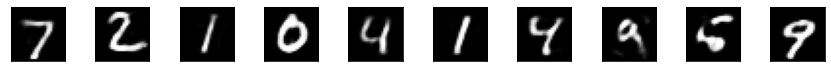

In [8]:
def visualize_predictions(encoder,autoencoder,X_test):
    
    encoded_images = encoder.predict(X_test)
    predicted_images = autoencoder.predict(X_test)
    
    # Original Images
    print("Original Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i + 1)
        plt.imshow(X_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
    # display Encoded Images (latent space)
    print("Encoded Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i + 1)
        plt.imshow(encoded_images[i].reshape(8,4))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
        
    # display Decoded Images
    print("Decoded Images - first 10 images of X_test")
    plt.figure(figsize=(30, 1))
    for i in range(10):
        ax = plt.subplot(1, 20, i+ 1)
        plt.imshow(predicted_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
        
visualize_predictions(encoder,auto_encoder,x_test)

### Second, a deeper MLP AutoEncoder for Mnist Dataset

> Architecture :  Image(784 pixeis) -> Dense(128) -> Dense(64) -> Dense(32) -> Dense(64) -> Dense(128) -> Dense(784 pixeis)

In [9]:
def create_AutoEncoder():
    
    input_image = Input(shape=(784,))
    
    encoded = Dense(128, activation = 'relu')(input_image)
    
    encoded = Dense(64, activation = 'relu')(encoded)
    
    encoded = Dense(32, activation = 'relu')(encoded)
    
    decoded = Dense(64,activation = 'relu')(encoded)
    
    decoded = Dense(128,activation = 'relu')(decoded)
    
    decoded = Dense(784,activation = 'sigmoid')(decoded)
    
    encoder = Model(inputs = input_image, outputs = encoded)
    
    auto_encoder = Model(inputs = input_image, outputs = decoded)
    
    return auto_encoder, encoder

(auto_encoder, encoder) = create_AutoEncoder()

print("\n############### ENCODER #################")
encoder.summary()
print("\n############### ENCODER + DECODER #################")
auto_encoder.summary()


############### ENCODER #################
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________

############### ENCODER + DECODER #################
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_

> Como podemos observar pelo gráfico, a accuuracy não varia nada em comparação com o outro modelo, ou seja, este modelo apesar de ser mais complexo ("deep") não é o modelo adequado para este tipo de problema.

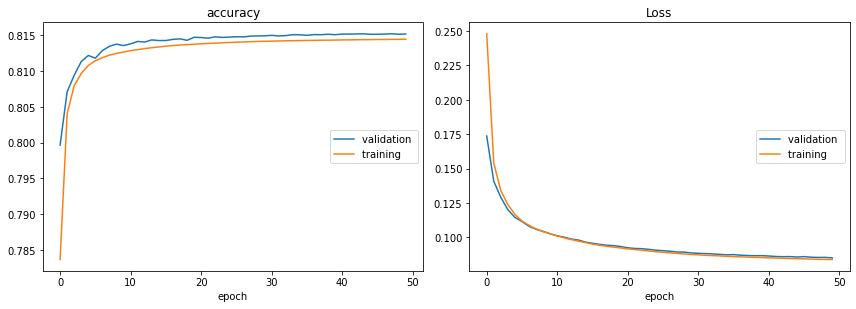

accuracy
	validation       	 (min:    0.800, max:    0.815, cur:    0.815)
	training         	 (min:    0.781, max:    0.814, cur:    0.814)
Loss
	validation       	 (min:    0.085, max:    0.189, cur:    0.085)
	training         	 (min:    0.084, max:    0.279, cur:    0.084)


In [10]:
from livelossplot import PlotLossesKeras

(auto_encoder, encoder) = create_AutoEncoder()
auto_encoder.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])
history = auto_encoder.fit(x_train, x_train, epochs = 50, shuffle = True, batch_size = 200, validation_split = 0.2, callbacks = [PlotLossesKeras()])

Original Images - first 10 images of X_test


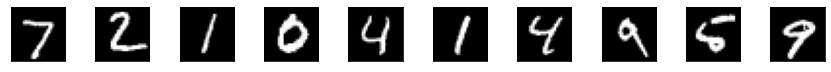

Encoded Images - first 10 images of X_test


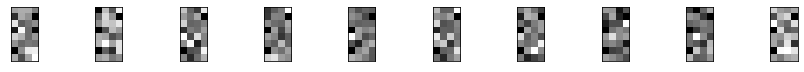

Decoded Images - first 10 images of X_test


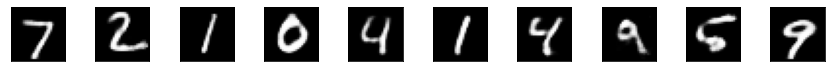

In [11]:
visualize_predictions(encoder,auto_encoder,x_test)

## Third, the same MLP AutoEncoder for Mnist Dataset, but now we add some noise to the images

Architecture : Image(784 pixeis) -> Dense(128) -> Dense(64) -> Dense(32) -> Dense(64) -> Dense(128) -> Dense(784 pixeis)

In [12]:
x_train, y_train, x_test, y_test = import_data(dataset = "mnist", fully_connected = True, show_info = False, noise = True)

## As we can expect, the accuracy will go down, since the images have some noise now

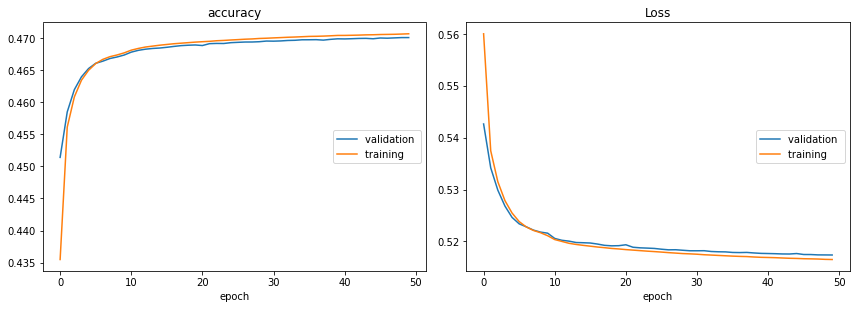

accuracy
	validation       	 (min:    0.451, max:    0.815, cur:    0.470)
	training         	 (min:    0.436, max:    0.814, cur:    0.471)
Loss
	validation       	 (min:    0.085, max:    0.543, cur:    0.517)
	training         	 (min:    0.084, max:    0.560, cur:    0.517)


In [13]:
from livelossplot import PlotLossesKeras

(auto_encoder, encoder) = create_AutoEncoder()
auto_encoder.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])
history = auto_encoder.fit(x_train, x_train, epochs = 50, shuffle = True, batch_size = 200, validation_split = 0.2, callbacks = [PlotLossesKeras()])

### The beauty in this algorithm, is that an AutoEncoder can detect the noise in this images because when we use a network to classify an image, the images have a noise and a pattern, the auto-encoder finds the pattern in is latent space, our Dense(32), and because of that, the decoder part of the auto-encoder can generalize the image without noise.

Original Images - first 10 images of X_test


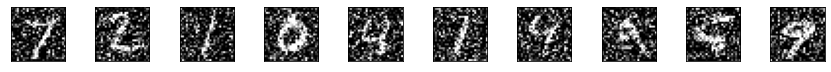

Encoded Images - first 10 images of X_test


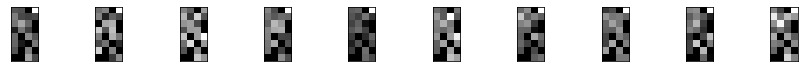

Decoded Images - first 10 images of X_test


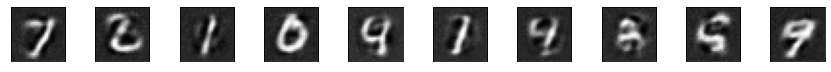

In [14]:
visualize_predictions(encoder,auto_encoder,x_test)

# Variational autoencoder with encoder/decoder Conv2D

## Convolutional Architecture:
> Encoder: Conv2D(32 filters) -> Conv2D(64) -> Conv2D(64) -> Conv2D(64) -> Flatten() -> Dense(32) -> Latent Space

> Latent Space is composed by tow Denses with 2 neurons representing the mean and the variance

> Decoder: Latent Space -> Dense(12544) -> Reshape -> Conv2DTranspose(32) -> Con2D(1)

> The last Conv2D have 1 filter to represent the image (28,28,1) 

> Check the summary of the model

In [15]:
x_train, y_train, x_test, y_test = import_data(dataset = "mnist", fully_connected = False, show_info = False, noise = False)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [16]:
from keras.layers import Conv2D, Reshape, Flatten, Conv2DTranspose

In [17]:
def create_encoder():
    input_image= Input(shape=(28, 28, 1)) #imagens do MNIST
    encoded1 = Conv2D(32, 3, padding='same', activation='relu')(input_image)
    encoded2 = Conv2D(64, 3, padding='same', activation='relu', strides=(2, 2))(encoded1)
    encoded3 = Conv2D(64, 3, padding='same', activation='relu')(encoded2)
    encoded4 = Conv2D(64, 3, padding='same', activation='relu')(encoded3)
    encoded5 = Flatten()(encoded4)
    encoded6 = Dense(32, activation='relu')(encoded5)
    t_mean = Dense(2)(encoded6) #o 2 refere-se à dimensão do latent space
    t_log_var = Dense(2)(encoded6)
    #ver documentação do keras:
    #Output of the created model are the sufficient statistics
    #of the variational distriution q(t|x;phi), mean and log variance.
    encoder = Model(inputs=input_image, outputs=[t_mean, t_log_var], name='encoder')
    return encoder
                                                                                

def create_decoder():
    decoder_input = Input(shape=(2,)) #o 2 refere-se à dimensão do latent space (samplin
    decoded1 = Dense(12544, activation='relu')(decoder_input) #12544 = 14*14*64
    decoded2 = Reshape((14, 14, 64))(decoded1)
    decoded3 = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2, 2))(decoded2)
    decoded4 = Conv2D(1, 3, padding='same', activation='sigmoid')(decoded3)
    #Outputs são imagens com shape (28, 28, 1) onde o valor de cada pixel corresponde à
    decoder = Model(inputs=decoder_input, outputs=decoded4, name='decoder')
    return decoder          
                                                                                
encoder = create_encoder()
decoder = create_decoder()
print("\n############### ENCODER #################")
encoder.summary()
print("\n############### DECODER #################")
decoder.summary()


############### ENCODER #################
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   320         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   18496       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   36928       conv2d_2[0][0]                   
_________________________________________________

In [18]:
#código baseado no exemplo da documentação do keras
from keras.backend import sqrt, exp, random_normal, shape

def sample(args):
    '''
    Draws samples from a standard normal and scales the samples with
    standard deviation of the variational distribution and shifts them by the mean.
    Args: sufficient statistics of the variational distribution.
    Returns: Samples from the variational distribution.
    '''
    
    t_mean, t_log_var = args
    t_sigma = sqrt(exp(t_log_var))
    epsilon = random_normal(shape= shape(t_mean), mean=0., stddev=1.)
    return t_mean + t_sigma * epsilon
    

In [19]:
#Lambda layers in Keras help you to implement layers or functionality that is not prebuid
#and which do not require trainable weights.

from keras.layers import Lambda

def create_sampler(): #Creates a sampling layer.
    return Lambda(sample, name='sampler') #Lambda refer-se ao layer.Lambda

sampler = create_sampler()
    
def create_vae():
    input_image = Input(shape=(28, 28, 1))
    t_mean, t_log_var = encoder(input_image) # mean and variance
    t = sampler([t_mean, t_log_var]) #novo layer para fazer o sampling
    t_decoded = decoder(t)
    vae = Model(inputs = input_image, outputs = t_decoded, name='vae')
    
    return vae, t_mean, t_log_var

vae,t_mean, t_log_var = create_vae()
print("\n############### VARIATIONAL AUTOENCODER #################")
vae.summary()



############### VARIATIONAL AUTOENCODER #################
Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 494244      input_8[0][0]                    
__________________________________________________________________________________________________
sampler (Lambda)                (None, 2)            0           encoder[1][0]                    
                                                                 encoder[1][1]                    
__________________________________________________________________________________________________
decoder (Model)                 (None

In [20]:
from keras.backend import sum,binary_crossentropy,batch_flatten, mean,square

#ver documentação do keras (variational autoencoders)
def neg_variational_lower_bound(input_image, t_decoded):
    '''
    Negative variational lower bound used as loss function
    for training the variational auto-encoder.
    Args:  input_image: input images
    t_decoded: reconstructed images
    '''
    # Reconstruction loss
    rc_loss = sum(binary_crossentropy(batch_flatten(input_image), batch_flatten(t_decoded)))
    
    # Regularization term (KL divergence)
    kl_loss = -0.5 * sum(1 + t_log_var - square(t_mean) - exp(t_log_var), axis=-1)
    
    # Average over mini-batch
    return mean(rc_loss + kl_loss)

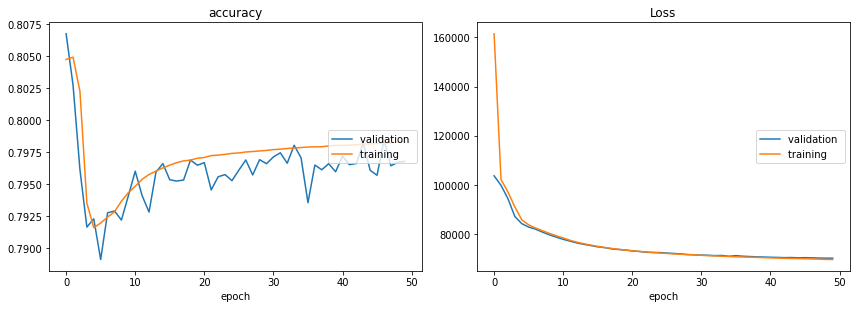

accuracy
	validation       	 (min:    0.451, max:    0.815, cur:    0.797)
	training         	 (min:    0.436, max:    0.814, cur:    0.798)
Loss
	validation       	 (min:    0.085, max: 103697.018, cur: 70202.871)
	training         	 (min:    0.084, max: 161486.152, cur: 69638.776)


In [21]:
vae,t_mean, t_log_var = create_vae()
vae.compile(optimizer="adam", loss = neg_variational_lower_bound, metrics = ["accuracy"])
history = vae.fit(x_train, x_train, epochs = 50, shuffle = True, batch_size = 500, validation_data = (x_test,x_test), callbacks = [PlotLossesKeras()])

In [22]:
def plot_t_test(t_test,y_test):
    # grafico do latent vector t_test colorido pelos valores dos digitos nas imagens de
    plt.figure(figsize=(8, 6))
    plt.scatter(t_test[:, 0], t_test[:, 1], marker='x', s=6.0, c=y_test,  cmap='brg')
    plt.colorbar();
    plt.show()

In [23]:
def plot2_t_test(t_test,y_test):
    plt.figure(figsize=(8, 6))
    plt.scatter(t_test[:, 0], t_test[:, 1],s=0.2, c=y_test, cmap='brg')
    plt.colorbar();
    #plt.set_xticks(())
    #plt.set_yticks(())
    count=0;
    plt.tight_layout()
    plt.suptitle("Isomap para digitos do MNIST")
    for label , x, y in zip(y_test, t_test[:, 0], t_test[:, 1]):
        #anotar na imagem cada 1 em 300 amostras
        if count % 350 == 0:
            plt.annotate(str(int(label)),xy=(x,y), color='black', weight='normal',size=10)
            count = count + 1
            #plt.savefig("mnist_pca.png")
            plt.show()

X_test: (10000, 28, 28, 1)
t_mean_test: (10000, 2)
t_log_var_test: (10000, 2)


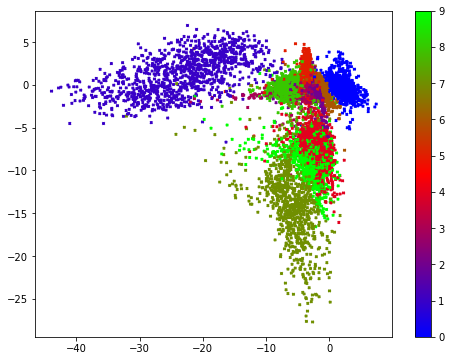

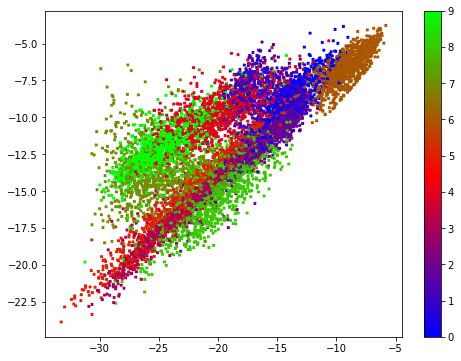

In [24]:
#vae = load_model('model_vae_v1.h5') #não funciona pois o layers de sampling não é do k
#vae.load_weights('best_weights.hdf5')

# Generar os latent vectors dos test set
print("X_test:",x_test.shape)
tt_test = encoder.predict(x_test, batch_size=100)#[0]
t_mean_test=tt_test[0]
t_log_var_test=tt_test[1]
print("t_mean_test:",t_mean_test.shape)
print("t_log_var_test:",t_log_var_test.shape)
plot_t_test(t_mean_test,y_test)
plot_t_test(t_log_var_test,y_test)
#plot2_t_test(t_mean_test,y_test)



In [25]:
from scipy.stats import norm

def generate_images():
    # Numero de amostras por dimensão
    n = 15
    batch_size=100
    # Construir uma matriz de valores para as latent variable
    # Amostras com intervalo de confiança de 90% da distribuição Gaussiana
    # com densidade de amostragem proporcional à densidade probabilistica
    grid_x = norm.ppf(np.linspace(0.05, 0.95, n)) #lista com n=15 elementos
    grid_y = norm.ppf(np.linspace(0.05, 0.95, n)) #lista com n=15 elementos
    print("   grid_x     --      grid_y")
    for i in range(len(grid_x)):
        print(" %f  --    %f"%(grid_x[i],grid_y[i]))
    
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n)) #matriz para n=15*28 por n=15*28
    # fazer o decode para cada elemento da grelha
    
    for i, yi in enumerate(grid_x): #vai dar tuplos (0,-1.64485363e+00) (1,...)...
        for j, xi in enumerate(grid_y): #vai dar tuplos (0,-1.64485363e+00) (1,...)...
            t_amostra = np.array([[xi, yi]])
            t_amostra = np.tile(t_amostra, batch_size).reshape(batch_size, 2)
            t_decoded = decoder.predict(t_amostra, batch_size=100)
            digit = t_decoded[0].reshape(digit_size, digit_size)
            figure[i*digit_size:(i+1)*digit_size , j*digit_size:(j+1)*digit_size] = digit
    plt.figure(figsize=(10, 10))
    plt.imshow(figure, cmap='Greys_r');

   grid_x     --      grid_y
 -1.644854  --    -1.644854
 -1.204047  --    -1.204047
 -0.920823  --    -0.920823
 -0.697141  --    -0.697141
 -0.503965  --    -0.503965
 -0.328072  --    -0.328072
 -0.161844  --    -0.161844
 -0.000000  --    -0.000000
 0.161844  --    0.161844
 0.328072  --    0.328072
 0.503965  --    0.503965
 0.697141  --    0.697141
 0.920823  --    0.920823
 1.204047  --    1.204047
 1.644854  --    1.644854


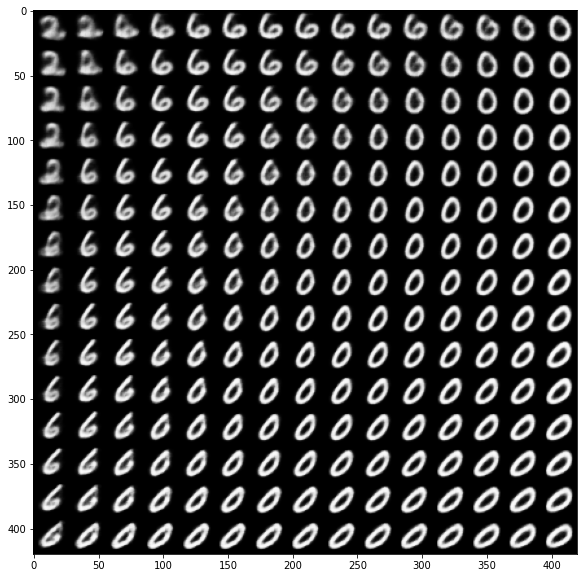

In [26]:
generate_images()

In [27]:
def generate_digit(x,y):
    
    digit_size = 28
    figure = np.zeros((digit_size, digit_size)) #matriz para n=15*28 por n=15*28
    amostra=np.array([[x, y]])
    t_decoded = decoder.predict(amostra)
    digit = t_decoded[0].reshape(digit_size, digit_size)
    plt.figure(figsize=(5, 5))
    plt.imshow(digit, cmap='Greys_r');

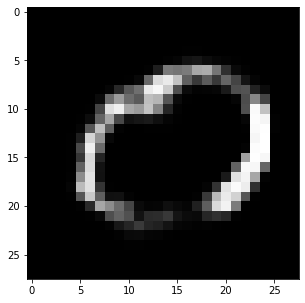

In [28]:
generate_digit(10,0)

# Lets see the Variational Auto Encoder in the Mnist Fashion

4423680/4422102 [==============================] - 1s 0us/step
***** Log import_data *****
Train data shape (60000, 28, 28)
Test data shape (10000, 28, 28)
Number of training samples 60000
Number of testing samples 10000


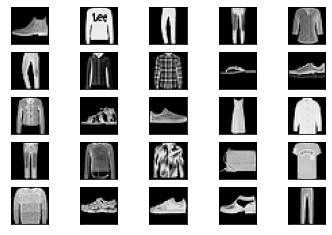

***** ***** *****  *****
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [29]:
x_train, y_train, x_test, y_test = import_data(dataset = "fashion", fully_connected = False, show_info = True, noise = False)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

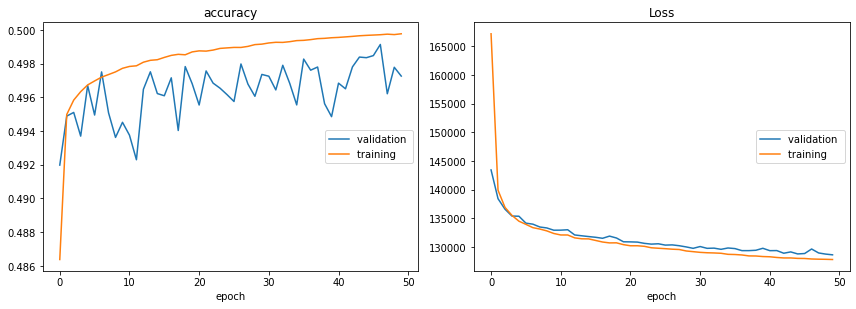

accuracy
	validation       	 (min:    0.451, max:    0.815, cur:    0.497)
	training         	 (min:    0.436, max:    0.814, cur:    0.500)
Loss
	validation       	 (min:    0.085, max: 143450.999, cur: 128638.527)
	training         	 (min:    0.084, max: 167207.223, cur: 127819.184)


In [30]:
vae,t_mean, t_log_var = create_vae()
vae.compile(optimizer="adam", loss = neg_variational_lower_bound, metrics = ["accuracy"])
history = vae.fit(x_train, x_train, epochs = 50, shuffle = True, batch_size = 500, validation_data = (x_test,x_test), callbacks = [PlotLossesKeras()])

X_test: (10000, 28, 28, 1)
t_mean_test: (10000, 2)
t_log_var_test: (10000, 2)


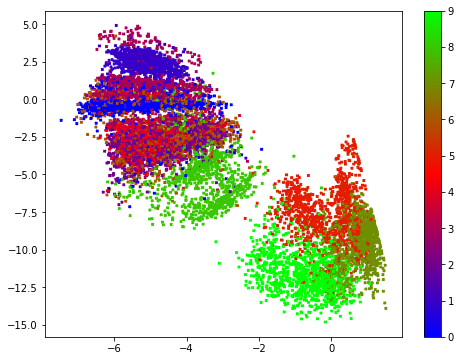

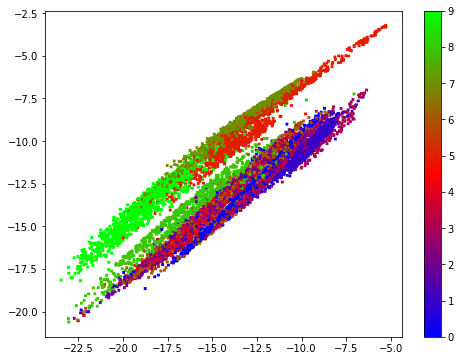

In [31]:
#vae = load_model('model_vae_v1.h5') #não funciona pois o layers de sampling não é do k
#vae.load_weights('best_weights.hdf5')

# Generar os latent vectors dos test set
print("X_test:",x_test.shape)
tt_test = encoder.predict(x_test, batch_size=100)#[0]
t_mean_test=tt_test[0]
t_log_var_test=tt_test[1]

print("t_mean_test:",t_mean_test.shape)
print("t_log_var_test:",t_log_var_test.shape)
plot_t_test(t_mean_test,y_test)
plot_t_test(t_log_var_test,y_test)
#plot2_t_test(t_mean_test,y_test)

   grid_x     --      grid_y
 -1.644854  --    -1.644854
 -1.204047  --    -1.204047
 -0.920823  --    -0.920823
 -0.697141  --    -0.697141
 -0.503965  --    -0.503965
 -0.328072  --    -0.328072
 -0.161844  --    -0.161844
 -0.000000  --    -0.000000
 0.161844  --    0.161844
 0.328072  --    0.328072
 0.503965  --    0.503965
 0.697141  --    0.697141
 0.920823  --    0.920823
 1.204047  --    1.204047
 1.644854  --    1.644854


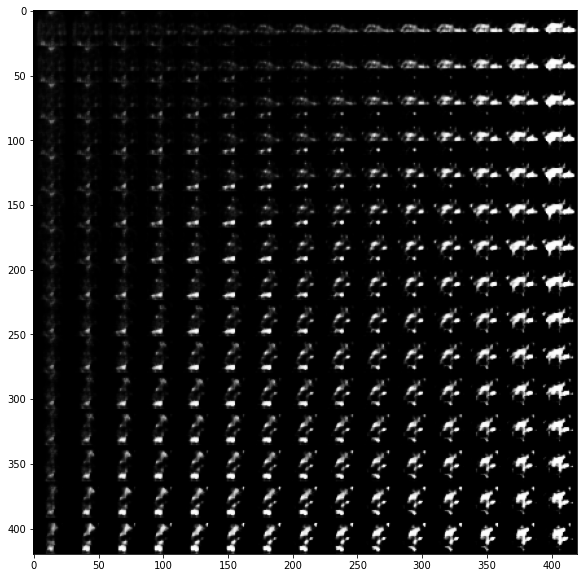

In [32]:
generate_images()

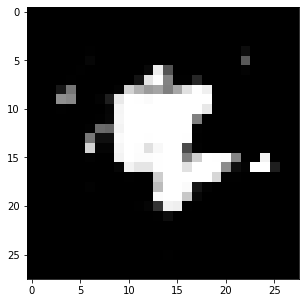

In [33]:
generate_digit(4,3)